### Importing Libraries

In [1]:
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

### Import the dataset

In [2]:
messages = pd.read_csv('SMSSpamCollection', sep = '\t', names=['label', 'messgaes'])

In [3]:
messagesLen = len([line.rstrip() for line in open('SMSSpamCollection')])
messagesLen

5574

### Exploratory Data Analysis

In [4]:
# Identify if the length of the message can help with ham/spam identification
messages['length'] = messages['messgaes'].apply(len)
messages.head()

,label,messgaes,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


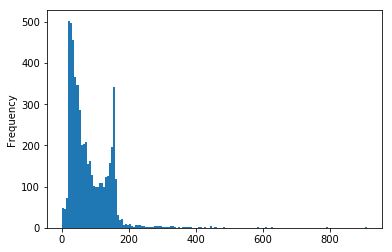

In [5]:
messages['length'].plot.hist(bins=150)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EEECAB0DD8>,
      dtype=object)

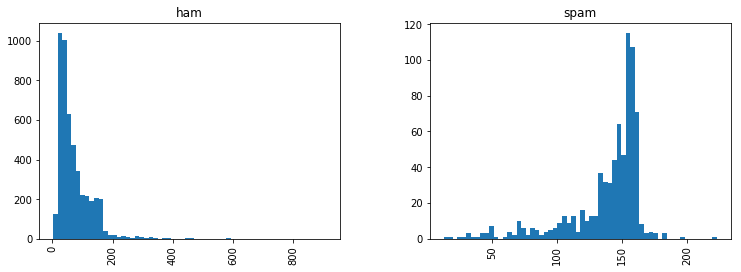

In [6]:
messages.hist(column='length', by = 'label', bins = 60, figsize = (12,4))

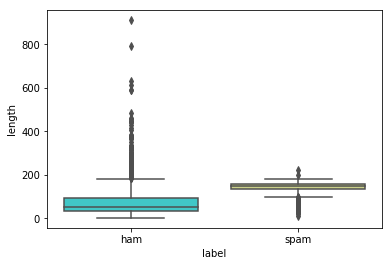

In [7]:
sns.boxplot(x='label',y='length',data=messages,palette='rainbow')

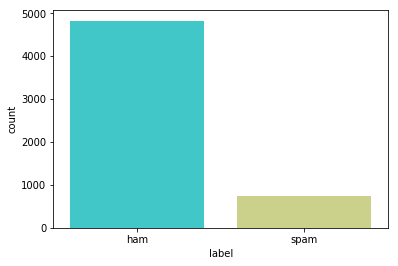

In [8]:
sns.countplot(x='label',data=messages,palette='rainbow')

Conclusion: most Spam messages are smaller in text length

### Creating corpus, tokenization, stemming, stopwords

In [9]:
corpus = []

## Text Preprocessing

In [10]:
for i in range(0, 5572):
    review = re.sub('[^a-zA-Z]', ' ', messages["messgaes"][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
print(len(corpus))

5572


## Creating the Bag of Words model

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = messages.iloc[:, 0].values

## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the Naive Bayes model on the Training set

In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

## Predicting the Test set results

In [14]:
y_pred = classifier.predict(X_test)
for i in range(0,len(y_pred)):
    if(y_pred[i] != y_test[i]):
        print(y_pred[i], y_test[i])

spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
ham spam
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
ham spam
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
ham spam
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
ham spam
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
ham spam
ham spam
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
ham spam
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
ham spam
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
spam ham
s

## Making the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print("Confusion Matrix")
print(cm)
print("Accuracy: ", ac)

Confusion Matrix
[[764 191]
 [ 12 148]]
Accuracy:  0.8179372197309417
